In [17]:
# Bibliothèques
import pandas as pd
import numpy as np

Exploration

In [19]:
# import des données
train_data = pd.read_csv('airbnb_train.csv')
test_data = pd.read_csv('airbnb_test.csv')

In [21]:
print("Train Data:")
train_data.head()

Train Data:


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identity_verified  22178 non-null

In [24]:
train_data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,2.223400e+04,22234.000000,22234.000000,22183.000000,22234.000000,22234.000000,22234.000000,17256.000000,22208.000000,22199.000000
mean,1.122269e+07,4.783481,3.155573,1.236037,38.462971,-92.269305,20.670774,94.069077,1.264769,1.711473
std,6.080480e+06,0.718758,2.143870,0.586246,3.071679,21.670081,37.183731,7.782235,0.852819,1.254903
min,3.362000e+03,2.302585,1.000000,0.000000,33.339002,-122.510940,0.000000,20.000000,0.000000,0.000000
25%,6.202924e+06,4.317488,2.000000,1.000000,34.136082,-118.340633,1.000000,92.000000,1.000000,1.000000
50%,1.217425e+07,4.700480,2.000000,1.000000,40.662632,-76.994944,6.000000,96.000000,1.000000,1.000000
75%,1.639502e+07,5.220356,4.000000,1.000000,40.746358,-73.954599,23.000000,100.000000,1.000000,2.000000
max,2.120450e+07,7.600402,16.000000,8.000000,42.390248,-70.989359,505.000000,100.000000,10.000000,18.000000


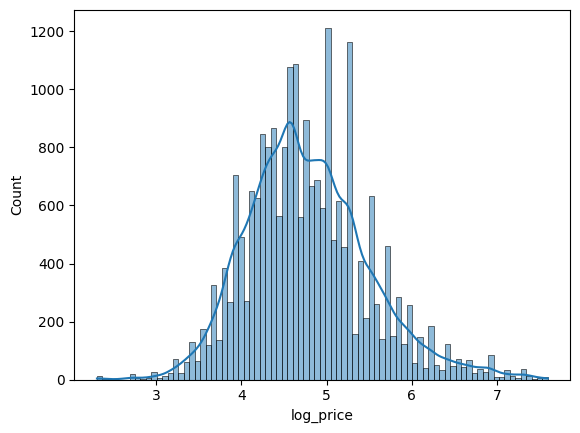

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la distribution des prix
sns.histplot(airbnb['log_price'], kde=True)
plt.show()

In [ ]:
print("Test Data:")
test_data.head()